In [2]:
from mxnet import gluon
from mxnet import ndarray as nd

def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')
mnist_train = gluon.data.vision.FashionMNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False, transform=transform)

In [3]:
data, label = mnist_train[0]
('example shape: ', data.shape, 'label:', label)

('example shape: ', (28, 28, 1), 'label:', 2.0)

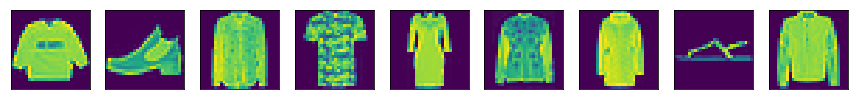

['pullover', 'ankle boot', 'shirt', 't-shirt', 'dress,', 'coat', 'coat', 'sandal', 'coat']


In [4]:
import matplotlib.pyplot as plt

def show_images(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28, 28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

def get_text_labels(label):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress,', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in label]

data, label = mnist_train[0:9]
show_images(data)
print(get_text_labels(label))

In [5]:
batch_size=256
train_data=gluon.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True)
test_data=gluon.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False)

In [6]:
num_inputs = 784
num_outputs = 10

In [19]:
W=nd.random_normal(shape=(num_inputs, num_outputs))
b=nd.random_normal(shape=(num_outputs))
params=[W,b]
for param in params:
    param.attach_grad()

In [20]:
from mxnet import nd
def softmax(X):
    exp = nd.exp(X)
    partition = exp.sum(axis=1, keepdims=True)
    return exp / partition

In [21]:
def net(X):
    return softmax(nd.dot(X.reshape((-1,num_inputs)), W) + b)

nd.pick(input,index,axis)函数:将index对应到沿着axis指示的轴上去，比如下面的代码的意思是  axis=1->对x的每行进行一次pick，第0行是x[0,y[0]]，第1行是x[1,y[1]],第2行是x[2,y[2]],即output[i]=input[i,index[i]]。

In [40]:
x = nd.array([[ 1.,  2.],
              [ 3.,  4.],
              [ 5.,  6.]])
y=  nd.array([0,1,1])
nd.pick(x, y, axis=1)


[ 1.  4.  6.]
<NDArray 3 @cpu(0)>

nd.pick(nd.log(yhat), y)实际上就是选出y=1时的log(yhat)。？？？？

In [22]:
def cross_entropy(yhat, y):
    return - nd.pick(nd.log(yhat), y)

In [23]:
def accuracy(output, label):
    return nd.mean(output.argmax(axis=1)==label).asscalar()

In [24]:

def evaluate_accuracy(data_iterator, net):
    acc = 0.
    for data, label in data_iterator:
        output = net(data)
        acc += accuracy(output, label)
    return acc / len(data_iterator)

In [25]:
evaluate_accuracy(test_data, net)

0.15537109374999999

In [26]:
import sys
sys.path.append('..')
from utils import SGD
from mxnet import autograd

In [27]:
learning_rate = 0.1
for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data, label in train_data:
        with autograd.record():
            output = net(data)
            loss = cross_entropy(output, label)
        loss.backward()
        SGD(params, learning_rate/batch_size)

        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output, label)

    test_acc = evaluate_accuracy(test_data, net)
    print("Epoch %d. Loss: %f, Train acc %f, Test acc %f" % (epoch, train_loss/len(train_data), train_acc/len(train_data), test_acc))

Epoch 0. Loss: 2.922806, Train acc 0.523892, Test acc 0.631836
Epoch 1. Loss: 1.749086, Train acc 0.660090, Test acc 0.682422
Epoch 2. Loss: 1.492234, Train acc 0.694321, Test acc 0.709570
Epoch 3. Loss: 1.355487, Train acc 0.715608, Test acc 0.725488
Epoch 4. Loss: 1.263401, Train acc 0.728596, Test acc 0.734570
